<a href="https://colab.research.google.com/github/MaicolFranco/Sales_Predictions/blob/main/Food_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

In [103]:
df = pd.read_csv("/content/drive/MyDrive/Data Scientist/week 1/sale/sales_predictions.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [104]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [105]:
df.shape

(8523, 12)

In [106]:
df.duplicated().sum()

0

In [107]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [108]:
df["Item_Weight"].isna().sum()

1463

In [109]:
df.drop(columns = ["Item_Weight", "Outlet_Establishment_Year"], inplace=True)
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


In [110]:
df.dtypes

Item_Identifier          object
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
dtype: object

In [111]:
numericos = []
no_numericos = []
def validar_cols(col):
    try:
        col_max = df[col].max()
        col_min = df[col].min() 
        if col_min < 0:
            print(f"In the col**** {col}*** there is at leat a value under 0 ******* check!")
            numericos.append({col +"_min": col_min})
        if col_max > 1:
            print(f"In the col **** {col} **** there is at leat a value over 1 it makes sense? *********** check!")
            numericos.append({col + "_max": col_max})
        else:
            print(f"the next numerical col seem not to present incosistencies: {col}")
    except:
        no_numericos.append(col)
        print(f"---------column {col} not checked - not numerical col ----------------")

In [112]:
for colum in list(df.columns):
    validar_cols(colum)
print("\n","Check this values:", numericos)
print("\n", "Non mumeric columns to check: ",no_numericos)

---------column Item_Identifier not checked - not numerical col ----------------
---------column Item_Fat_Content not checked - not numerical col ----------------
the next numerical col seem not to present incosistencies: Item_Visibility
---------column Item_Type not checked - not numerical col ----------------
In the col **** Item_MRP **** there is at leat a value over 1 it makes sense? *********** check!
---------column Outlet_Identifier not checked - not numerical col ----------------
---------column Outlet_Size not checked - not numerical col ----------------
---------column Outlet_Location_Type not checked - not numerical col ----------------
---------column Outlet_Type not checked - not numerical col ----------------
In the col **** Item_Outlet_Sales **** there is at leat a value over 1 it makes sense? *********** check!

 Check this values: [{'Item_MRP_max': 266.8884}, {'Item_Outlet_Sales_max': 13086.9648}]

 Non mumeric columns to check:  ['Item_Identifier', 'Item_Fat_Content',

In [113]:
for column in no_numericos:
    print("\n", column, df[column].unique())


 Item_Identifier ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

 Item_Fat_Content ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

 Item_Type ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

 Outlet_Identifier ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

 Outlet_Size ['Medium' nan 'High' 'Small']

 Outlet_Location_Type ['Tier 1' 'Tier 3' 'Tier 2']

 Outlet_Type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [114]:
df["Item_Fat_Content"].replace(["LF","reg","low fat"],["Low Fat", "Regular","Low Fat"], inplace=True)
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [115]:
df.groupby(["Outlet_Type","Outlet_Location_Type","Outlet_Identifier"])["Outlet_Size"].unique()

Outlet_Type        Outlet_Location_Type  Outlet_Identifier
Grocery Store      Tier 1                OUT019                [Small]
                   Tier 3                OUT010                  [nan]
Supermarket Type1  Tier 1                OUT046                [Small]
                                         OUT049               [Medium]
                   Tier 2                OUT017                  [nan]
                                         OUT035                [Small]
                                         OUT045                  [nan]
                   Tier 3                OUT013                 [High]
Supermarket Type2  Tier 3                OUT018               [Medium]
Supermarket Type3  Tier 3                OUT027               [Medium]
Name: Outlet_Size, dtype: object

In [116]:
df["Outlet_Size"] = df["Outlet_Size"].fillna("Missing")
df["Outlet_Size"].isna().sum()

0

In [117]:
df.describe()

,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,2181.288914
std,0.051598,62.275067,1706.499616
min,0.000000,31.290000,33.290000
25%,0.026989,93.826500,834.247400
50%,0.053931,143.012800,1794.331000
75%,0.094585,185.643700,3101.296400
max,0.328391,266.888400,13086.964800


Text(0.5, 1.0, 'different distributions')

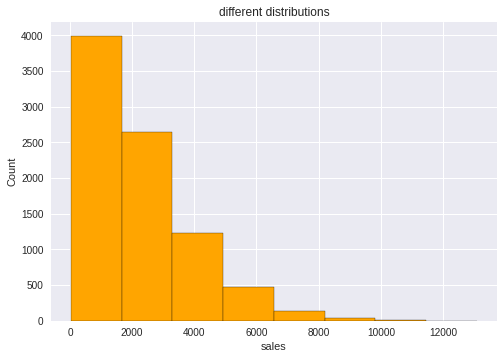

In [118]:
plt.style.use("seaborn")
df["Item_Outlet_Sales"].hist(bins = 8, edgecolor = "black", color= "Orange")
plt.xlabel("sales")
plt.ylabel("Count")
plt.title("different distributions")

In [121]:
df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

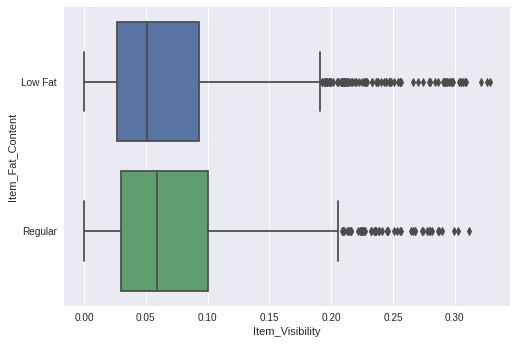

In [123]:
sns.boxplot(x='Item_Visibility', y='Item_Fat_Content', data=df)

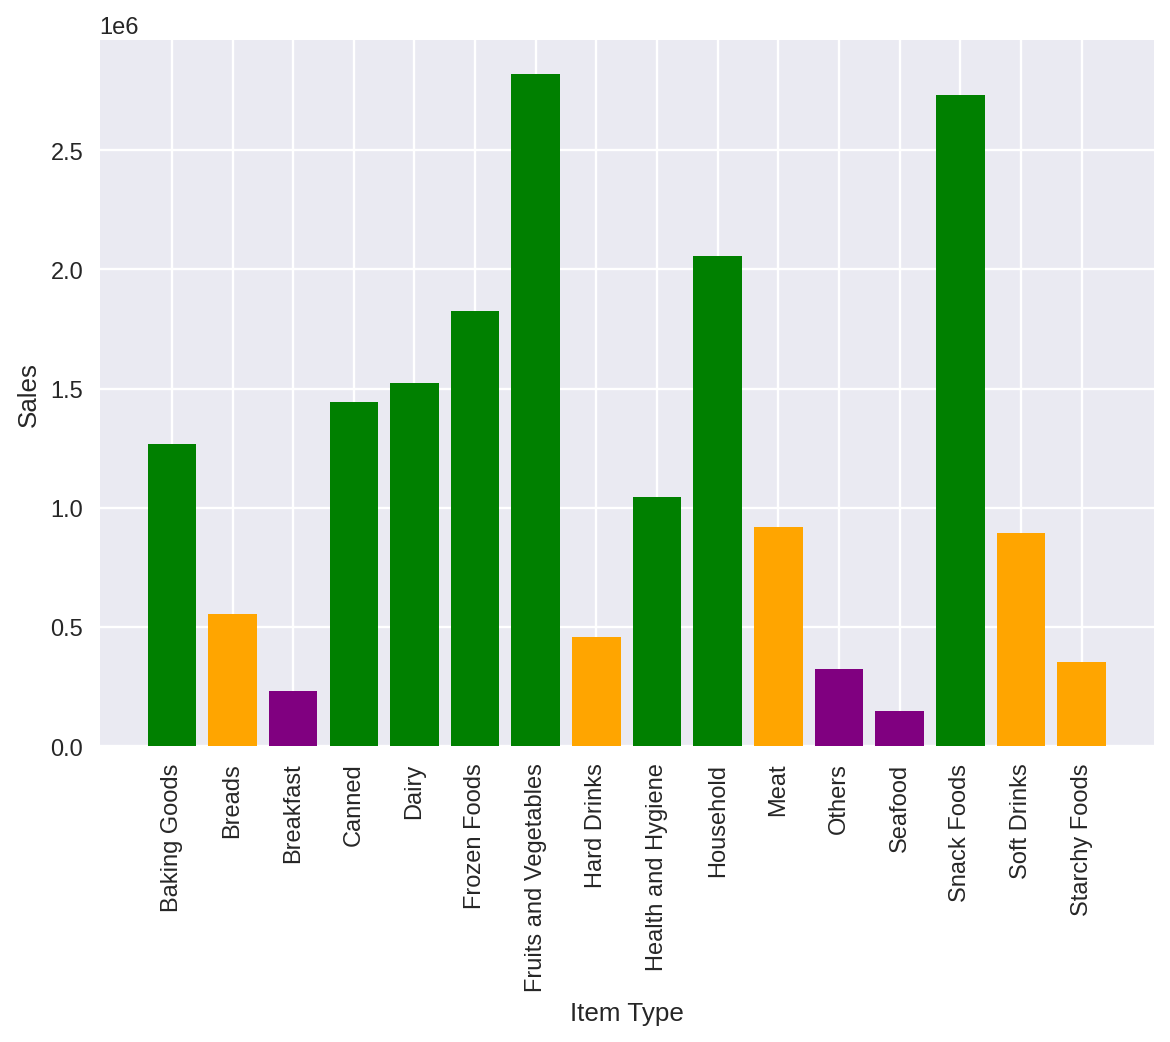

In [147]:
different_categores = df.groupby("Item_Type")["Item_Outlet_Sales"].sum()  
fig1 = plt.figure(dpi=170)
ax1 = fig1.add_subplot()
bars = ax1.bar(list(different_categores.index),different_categores, align='center', linewidth=0, color='orange')
plt.xlabel("Item Type")
plt.xticks(rotation = 90)
plt.ylabel("Sales")
for x in bars:
    bar_1 = bars[10].get_height()
    bar_2 = bars[15].get_height()
    if x.get_height() > bar_1:
        x.set_color('green')
    elif x.get_height() < bar_2:
        x.set_color("purple")


In [149]:
df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [161]:
df["Outlet_Size"].unique()

array(['Medium', 'Missing', 'High', 'Small'], dtype=object)

In [166]:
df["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [180]:
colums_new = df.replace(list(df["Outlet_Size"].unique()), [2, 0, 3, 1])
colums_new.replace(list(df["Outlet_Location_Type"].unique()), [1, 2 ,3], inplace=True)
colums_new

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,2,1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2,2,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,2,1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,0,2,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,3,2,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,3,2,Supermarket Type1,2778.3834
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,0,3,Supermarket Type1,549.2850
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,1,3,Supermarket Type1,1193.1136
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2,2,Supermarket Type2,1845.5976


In [184]:
corr = colums_new.corr()
corr.head()

,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
Item_Visibility,1.000000,-0.001315,-0.087796,-0.076912,-0.128625
Item_MRP,-0.001315,1.000000,0.002473,0.001887,0.567574
Outlet_Size,-0.087796,0.002473,1.000000,-0.440765,0.172477
Outlet_Location_Type,-0.076912,0.001887,-0.440765,1.000000,0.099404
Item_Outlet_Sales,-0.128625,0.567574,0.172477,0.099404,1.000000


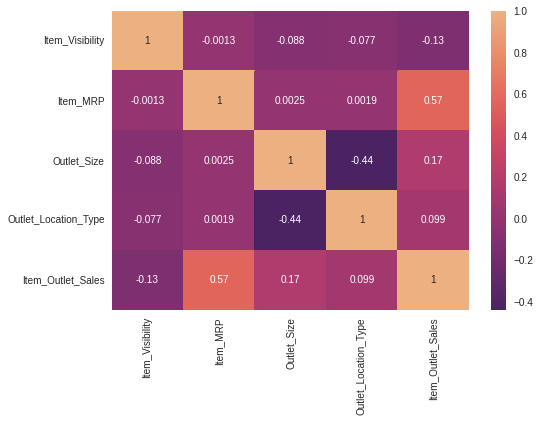

In [191]:
sns.heatmap(corr, cmap = "flare_r", annot = True)